In [1]:
result_file = open("sparse_cl_sample.csv",'w')
with open("craigslistVehiclesFull.csv", "r") as f:
    data = []
    count = 0
    firstline = True
    totlines = 0
    for line in f: 
        if totlines >= 5000:
            break
        if firstline == True:
            # Write header line
            result_file.write(line)
            firstline = False
        count += 1
        if count // 500 != 0:
            result_file.write(line)
            totlines += 1
            count = 0
print(totlines)        
result_file.close()

3446


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
df_full = pd.read_csv('craigslistVehiclesFull.csv')
df = df_full.sample(3000)

In [24]:
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
1550198,https://quadcities.craigslist.org/ctd/d/2004-f...,quadcities,4500,2004.0,ford,f350,NaN,NaN,diesel,NaN,...,NaN,https://images.craigslist.org/00U0U_hSGsZmOYi1...,41.516017,-90.603304,19163.0,Scott,19.0,IA,Iowa,47.0
602897,https://eugene.craigslist.org/cto/d/2001-acura...,eugene,4000,2001.0,acura,integra,NaN,NaN,gas,183000.0,...,white,https://images.craigslist.org/00D0D_PVwYfY18vs...,44.068200,-123.081900,41039.0,Lane,41.0,OR,Oregon,50.0
1375099,https://boise.craigslist.org/cto/d/06-ford-foc...,boise,2500,2006.0,ford,focus,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00l0l_hCBLJZWoVM...,43.583400,-116.584800,16027.0,Canyon,16.0,ID,Idaho,47.0
501515,https://maine.craigslist.org/cto/d/reliable-ca...,maine,5000,2009.0,hyundai,elantra touring,good,4 cylinders,gas,111201.0,...,grey,https://images.craigslist.org/00c0c_g0p2nkqJcs...,43.901965,-69.984899,23005.0,Cumberland,23.0,ME,Maine,44.0
548138,https://frederick.craigslist.org/cto/d/2013-fo...,frederick,21500,2013.0,ford,mustang,excellent,8 cylinders,gas,42000.0,...,white,https://images.craigslist.org/01313_eLSP2gtt7I...,39.665623,-78.923632,24001.0,Allegany,24.0,MD,Maryland,56.0


In [13]:
df['type'].tail()

3441     coupe
3442     truck
3443       NaN
3444     truck
3445    pickup
Name: type, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 26 columns):
url             3446 non-null object
city            3446 non-null object
price           3446 non-null int64
year            3433 non-null float64
manufacturer    3142 non-null object
make            3269 non-null object
condition       2038 non-null object
cylinders       2080 non-null object
fuel            3430 non-null object
odometer        2317 non-null float64
title_status    3444 non-null object
transmission    3430 non-null object
vin             1175 non-null object
drive           2114 non-null object
size            1205 non-null object
type            2072 non-null object
paint_color     2064 non-null object
image_url       3446 non-null object
lat             3446 non-null float64
long            3446 non-null float64
county_fips     3325 non-null float64
county_name     3325 non-null object
state_fips      3325 non-null float64
state_code      3325 non-null object


In [15]:
df.drop(columns=['county_fips', 
                 'url', 
                 'image_url', 
                 'county_name', 
                 'state_fips', 
                 'state_code', 
                 'weather'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 19 columns):
city            3446 non-null object
price           3446 non-null int64
year            3433 non-null float64
manufacturer    3142 non-null object
make            3269 non-null object
condition       2038 non-null object
cylinders       2080 non-null object
fuel            3430 non-null object
odometer        2317 non-null float64
title_status    3444 non-null object
transmission    3430 non-null object
vin             1175 non-null object
drive           2114 non-null object
size            1205 non-null object
type            2072 non-null object
paint_color     2064 non-null object
lat             3446 non-null float64
long            3446 non-null float64
state_name      3446 non-null object
dtypes: float64(4), int64(1), object(14)
memory usage: 511.6+ KB


In [17]:
cols = df.columns.tolist()
cols.remove('state_name')
cols.insert(2, 'state_name')

df=df[cols]
df.rename(columns={'state_name':'state'}, inplace=True)
df.head()

,city,price,state,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long
0,wilmington,2600,North Carolina,2007.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,34.895700,-78.043200
1,spokane,4900,Washington,1984.0,NaN,Porsche 944,good,4 cylinders,gas,89.0,clean,manual,NaN,rwd,NaN,NaN,NaN,47.841100,-117.375900
2,fortmyers,3350,Florida,2004.0,volkswagen,passat,good,4 cylinders,gas,155812.0,clean,automatic,Wvwpd63b14e213695,fwd,mid-size,sedan,silver,26.638866,-81.874580
3,kootenays,26800,FAILED,2017.0,jeep,renegade,NaN,4 cylinders,gas,23937.0,clean,automatic,ZACCJBDB3HPF53006,4wd,NaN,SUV,red,49.045530,-122.277718
4,lakeland,2000,Florida,2001.0,jeep,cherokee sport,NaN,6 cylinders,gas,103000.0,clean,automatic,1J4FT48591L515698,NaN,mid-size,SUV,black,27.951345,-81.595030


In [18]:
# Could probably handle all these in one swell foop, but I couldn't figure it out
df2 = df[df['lat'] > 20]
df = df2[df2['lat'] < 50]
df2 = df[df['long'] > -125]
df = df2[df2['long'] < -65]
df.head()

,city,price,state,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long
0,wilmington,2600,North Carolina,2007.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,34.895700,-78.043200
1,spokane,4900,Washington,1984.0,NaN,Porsche 944,good,4 cylinders,gas,89.0,clean,manual,NaN,rwd,NaN,NaN,NaN,47.841100,-117.375900
2,fortmyers,3350,Florida,2004.0,volkswagen,passat,good,4 cylinders,gas,155812.0,clean,automatic,Wvwpd63b14e213695,fwd,mid-size,sedan,silver,26.638866,-81.874580
3,kootenays,26800,FAILED,2017.0,jeep,renegade,NaN,4 cylinders,gas,23937.0,clean,automatic,ZACCJBDB3HPF53006,4wd,NaN,SUV,red,49.045530,-122.277718
4,lakeland,2000,Florida,2001.0,jeep,cherokee sport,NaN,6 cylinders,gas,103000.0,clean,automatic,1J4FT48591L515698,NaN,mid-size,SUV,black,27.951345,-81.595030


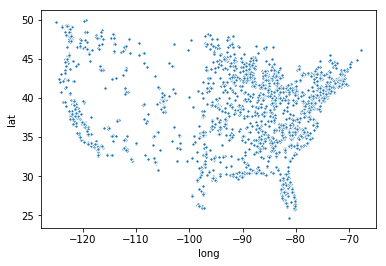

In [19]:
import seaborn as sns
sns.scatterplot(df["long"], df["lat"], s=10)

In [20]:
df2.to_csv('craigslist_cars_sample.csv', index=False)